C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_13424\799475471.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()
C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_13424\799475471.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()
C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_13424\799475471.py:66: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means = new_df.mean()


16.163607956871893
5.778145487619625
0.00015812046623366104
0.00015812046623366104
0.0001446793589469983
0.0001446793589469983
0.00013905152537364846
0.00013905152537364846
0.00013678959390307533
0.00013678959390307533
0.00012061197042297599
0.00012061197042297599
0.00011656219160393245
0.00011047247223759589
0.00011047247223759589
0.00010993379974044949
0.00010993379974044949
0.00010298390150175051
0.00010298390150175051
0.0001026750261703178
0.0001026750261703178
0.00010104501669921797
0.00010104501669921797
0.00010065241135095632
0.00010065241135095632
9.686746176191146e-05
9.686746176191146e-05
9.399943679796534e-05
9.399943679796534e-05
8.997349600074452e-05
8.997349600074452e-05
8.949185111047946e-05
8.932937700707974e-05
8.932937700707974e-05
8.794332225854213e-05
8.794332225854213e-05
8.533040107692789e-05
8.533040107692789e-05
7.824017378034012e-05
7.786240510636183e-05
7.786240510636183e-05
7.646310543399608e-05
7.646310543399608e-05
7.258074050320186e-05
7.258074050320186e-0

<AxesSubplot:title={'center':'Threshold showing Class'}>

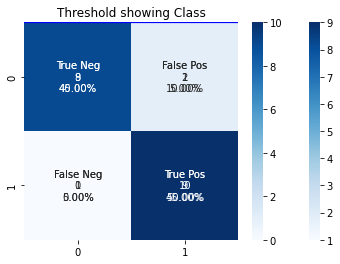

In [4]:
# I have modified the dataset by removing unnamed columns and adding target column
# In[1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import sympy as sp


# In[2]:


df = pd.read_csv("gender.csv")
df


# In[3]:


X=df.drop('target',axis=1)
Y=df["target"]


# In[4]:


new_df=X.join(pd.Series(Y,name='target'))
new_df


# In[5]:


class_feature_means = pd.DataFrame(columns=[])
for c, rows in new_df.groupby('target'):
    class_feature_means[c] = rows.mean()
class_feature_means


# In[6]:


within_class_scatter_matrix = np.zeros((128,128))
for c, rows in new_df.groupby('target'):
  rows = rows.drop(['target'], axis=1)
  s = np.zeros((128,128))
  for index, row in rows.iterrows():
    x, mc = row.values.reshape(128,1), class_feature_means[c].values.reshape(128,1)
    s += (x - mc).dot((x - mc).T)
  within_class_scatter_matrix += s


# In[7]:


within_class_scatter_matrix


# In[8]:


feature_means = new_df.mean()
between_class_scatter_matrix = np.zeros((128,128))
for c in class_feature_means:
  n = len(new_df.loc[new_df['target'] == c].index)
  mc, m = class_feature_means[c].values.reshape(128,1), feature_means.values.reshape(128,1)
  between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)


# In[9]:


between_class_scatter_matrix


# In[10]:


eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))


# In[11]:


eigen_values


# In[12]:


eigen_vectors


# In[13]:


pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])


# In[14]:


eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))


# In[15]:


w_matrix = np.hstack((pairs[0][1].reshape(128,1), pairs[1][1].reshape(128,1))).real
w_matrix


# In[16]:


X_lda=np.array(X.dot(w_matrix))
X_lda
frame=pd.DataFrame(X_lda)
frame


# In[17]:


ay=[]
ay.append(frame[0])
ay.append(frame[1])
zero=np.zeros(800)
plt.plot(ay[0],c='red')
plt.plot(ay[1],c='blue')
plt.title('Threshold showing Class');


# In[18]:


label=LabelEncoder()
y=label.fit_transform(new_df['target'])
y


# In[19]:


plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow',alpha=0.8,edgecolors='b');


# ## **BAYES Classifier**

# In[20]:


types = df.iloc[:, 0].unique()
test_df = pd.DataFrame()
train_df = pd.DataFrame()
for t in types:
    type_df = df[df.iloc[:, 0] == t]
    train_df = pd.concat([train_df, type_df.iloc[10:]])
    test_df = pd.concat([test_df, type_df.iloc[:10]])


# In[21]:


class BayesClassifier:
    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        self.classes, self.class_counts = np.unique(y_train, return_counts=True)
        self.no_of_classes = len(self.classes)
        self.total_data_points = len(y_train)
        self.apriori_probabilities = self.class_counts/self.total_data_points
        self.class_split_training_data = {}
        for c in self.classes:
            self.class_split_training_data[c] = []
            for j in range(len(y_train)):
                if c == y_train[j]:
                    self.class_split_training_data[c].append(X_train[j])
            self.class_split_training_data[c] = np.array(self.class_split_training_data[c])
        self.mean_vectors = []
        for c in self.classes:
            self.mean_vectors.append(np.mean(self.class_split_training_data[c], axis = 0))
        self.covariance_matrices = []
        for c in self.classes:
            self.covariance_matrices.append(np.cov(self.class_split_training_data[c], rowvar=False))
        self.inverse_covariance_matrices = []
        for c in range(len(self.classes)):
            self.inverse_covariance_matrices.append(np.linalg.inv(self.covariance_matrices[c]))
        self.dimensions = len(X_train[0])
        self.det_covariance_matrices = []
        for c in range(len(self.classes)):
            self.det_covariance_matrices.append(sp.Matrix(self.covariance_matrices[c]).det())

    def predict(self, X_test):
        y_pred = []
        for X in X_test:
            probability_values = {}
            class_count = 0
            for c in self.classes:
                p_xw = np.exp(-0.5 * np.dot(np.dot((X - self.mean_vectors[class_count]).T, self.inverse_covariance_matrices[class_count]), (X - self.mean_vectors[class_count]))) / (((2 * np.pi) ** (self.dimensions / 2)) * np.power(self.det_covariance_matrices[c], 0.5))
                p_wx = p_xw * self.apriori_probabilities[class_count]
                probability_values[c] = p_wx
                class_count += 1
            y_pred.append(max(probability_values, key=probability_values.get))
        y_pred = np.array(y_pred)
        return y_pred


# In[22]:


X_train = train_df.iloc[:, 1:].values
X_test = test_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
y_test = test_df.iloc[:, 0].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(y_train)
Y_test = le.fit_transform(y_test)
bc = BayesClassifier()
bc.fit(X_train, Y_train)


# In[23]:


y_pred_before = bc.predict(X_test)


# In[24]:


conf_matrix=confusion_matrix(Y_test, y_pred_before)
conf_matrix


# In[25]:
print("*******The values before LDA has applied******")

from sklearn.metrics import accuracy_score
print("Accuracy  : ",accuracy_score(Y_test,y_pred_before)*100)
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
prec=TP/TP+FP
print("Precision : ",prec)
rec=TP/TP+FN
print("Recall    : ",rec)
f1=2*(prec)*(rec)/(prec+rec)
print("F1 Score  : ",f1)


# In[26]:


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')


# ## **Decision Tree Classifier on LDA reduced Data**

# In[27]:


X_te= pd.DataFrame()
X_t = pd.DataFrame()
X_t = pd.concat([X_t, frame.iloc[10:400]])
X_te = pd.concat([X_te, frame.iloc[:10]])
X_t = pd.concat([X_t, frame.iloc[410:]])
X_te= pd.concat([X_te, frame.iloc[400:410]])


# In[28]:


X_train = X_t.iloc[:, 0:].values
X_test = X_te.iloc[:, 0:].values


# In[29]:



bc = BayesClassifier()
bc.fit(X_train, Y_train)


# In[30]:


Y_pred = bc.predict(X_test)


# In[31]:



cf_matrix=confusion_matrix(Y_test, Y_pred)
cf_matrix


# In[32]:
print("*******The values after LDA has applied******")

from sklearn.metrics import accuracy_score
print("Accuracy  : ",accuracy_score(Y_test,Y_pred)*100)
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
TN = cf_matrix[0][0]
prec=TP/TP+FP
print("Precision : ",prec)
rec=TP/TP+FN
print("Recall    : ",rec)
f1=2*(prec)*(rec)/(prec+rec)
print("F1 Score  : ",f1)


# In[33]:


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


Accuracy  :  95.0
Precision :  2.0
Recall    :  1.0
F1 Score  :  1.3333333333333333


<AxesSubplot:>

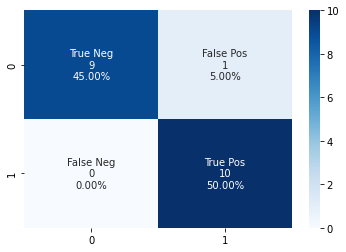

In [3]:
# ## **Decision Tree Classifier on LDA reduced Data**

# In[27]:


X_te= pd.DataFrame()
X_t = pd.DataFrame()
X_t = pd.concat([X_t, frame.iloc[10:400]])
X_te = pd.concat([X_te, frame.iloc[:10]])
X_t = pd.concat([X_t, frame.iloc[410:]])
X_te= pd.concat([X_te, frame.iloc[400:410]])


# In[28]:


X_train = X_t.iloc[:, 0:].values
X_test = X_te.iloc[:, 0:].values


# In[29]:



bc = BayesClassifier()
bc.fit(X_train, Y_train)


# In[30]:


Y_pred = bc.predict(X_test)


# In[31]:



cf_matrix=confusion_matrix(Y_test, Y_pred)
cf_matrix


# In[32]:


from sklearn.metrics import accuracy_score
print("Accuracy  : ",accuracy_score(Y_test,Y_pred)*100)
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
TN = cf_matrix[0][0]
prec=TP/TP+FP
print("Precision : ",prec)
rec=TP/TP+FN
print("Recall    : ",rec)
f1=2*(prec)*(rec)/(prec+rec)
print("F1 Score  : ",f1)


# In[33]:


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')